Group Member: Francis Ding, Jiaren Pan, Han Qin.

#Q1. 


    Read the data in your notebook and display the first 8 rows. How many columns and rows are there in this dataset? What are the column names?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

df = pd.read_csv('nobel.csv')

In [2]:
df.iloc[:8]

,year,category,prize,motivation,price_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,gender,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry,in recognition of the extraordinary services h...,1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,the Netherlands,male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature,in special recognition of his poetic compositi...,1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Peace,The Nobel Peace Prize,for his lifelong work for international peace ...,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,male,NaN,NaN,NaN,1912-06-12,Paris,France
3,1901,Peace,The Nobel Peace Prize,for his humanitarian efforts to help wounded s...,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Physics,The Nobel Prize in Physics,in recognition of the extraordinary services h...,1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep,Prussia,male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
5,1901,Physiology or Medicine,The Nobel Prize in Physiology or Medicine,"for his work on serum therapy, especially its ...",1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf,Prussia,male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry,in recognition of the extraordinary services h...,1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia,male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature,the greatest living master of the art of histo...,1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig,male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany


#Analysis. 
    
    
            Though we only display 8 rows in this page using df.loc(:8), the dataset we're working on have a total rows of 989, and 18 columns. The columns are based on a variety of components, these are "year, category, prize, motivation, price_share, laureate_id, laureate_type, full_name, birth_date, birth_city, birth_country, gender, organization_name, organization_city, organization_country, death_date, death_city, death_country".

#Q2. 

    All of the first 8 winners were from Europe. But that was back in 1901. Looking at all winners in this data, which gender and which country is the most commonly represented? (For country, we will use the birth_country of the winner.)

In [3]:
df.groupby('birth_country')['full_name'].count().sort_values(ascending=False)

birth_country
USA                        296
United Kingdom              92
Germany                     80
France                      58
Sweden                      30
                          ... 
Crete                        1
Pakistan                     1
German-occupied Poland       1
Peru                         1
Java, Dutch East Indies      1
Name: full_name, Length: 99, dtype: int64

In [4]:
df.groupby('gender')['full_name'].count().sort_values(ascending=False)

gender
male      898
female     61
Name: full_name, dtype: int64

#Analysis. 

#From the data manipulated and grouped by Pandas,we found out that the country that has the Top Winners is United States, and the gender that has the most Winners is male.



            

#Q3. 

        For the dominant country that you found in question 2, calculate the proportions of winners from that country in each decade. Make some plots to visualize your results. In which decade did the proportion reach the highest?

In [5]:
## we wanted to make grouping easier, thus I'm making a decades tag to each winner by using the pandas datetime module.
## Otherwise, we'll have to grab each data and slice it as a representative of 10 and assign it back using tags.
## New solution: 
## 1. I used select index solution that arrange the steps in 10.
## 2. I've converted df['year'] into str first and then to datetime datatype because pandas can't convert dftype np.int64
## directly to datetime object.
## 3. I've setted column date(datetime dtype) as the index, and trace it using row expressions with the comparison of int values.

df['decades'] = (df['year']// 10)* 10
dfCounts = df.groupby(['decades'])['prize'].count().reset_index()
dfUSA = df[df['birth_country'] == 'USA']
countUSA = dfUSA.groupby(['decades'])['prize'].count().reset_index()
countUSA['portion'] = (countUSA['prize'] / dfCounts['prize'] *100).round(2)

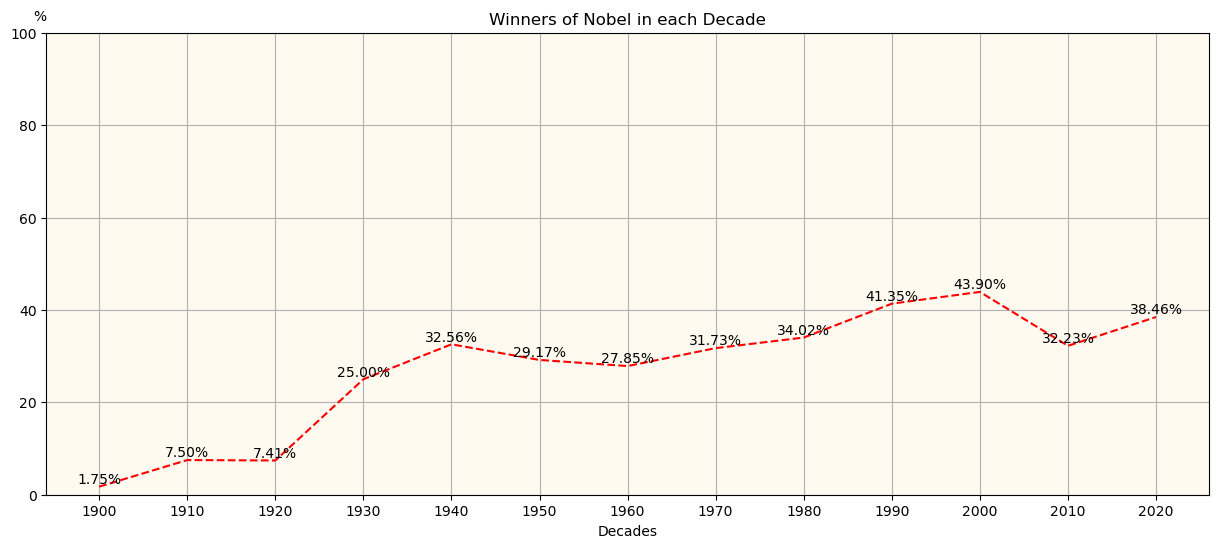

In [6]:
x = countUSA['decades']
y = countUSA['portion']

plt.rcParams['axes.facecolor'] = '#FFFAF0'
plt.figure(figsize=(15, 6))
## a bunch of configuration for y-axis ##
plt.ylim(0,100)
plt.ylabel('%', labelpad=20, rotation=0, ha='right')


## a bunch o configuration for x-axis ##
plt.xticks(x)
plt.xlabel('Decades')
## Placing the % sign.
plt.gca().yaxis.set_label_coords(0, 1.02)

## Placing the labels for each coordinates.
for i in range(len(x)):
    plt.annotate('{:.2f}%'.format(y[i]), xy=(x[i], y[i]), xytext=(x[i], y[i] + 0.05), ha='center', va='bottom')

##Plotting.
plt.grid()
plt.plot(x, y, linestyle = 'dashed', color='red',)
plt.title('Winners of Nobel in each Decade')
plt.show()

#Analysis:
                    
               From the data extracted from scientist and by creating brand new dataframes and series, we've analyzed that in 2000, there's about almost half of amount of total Nobel prize winner is within the USA, 43.90%.

#Q4.

    Is there any gender imbalance in this data? How significant is that? Calculate the proportion of female laureates in each decade. Visualize your results and discuss.

In [7]:
df4= df[df['laureate_type'] == 'Individual']
# df4['decades'] = (dfIndividual['year']//10) *10 this got an un-related warning because I already have decades in df.
countAll = df4.groupby('decades')['prize'].count().reset_index()

dfMale = df4[df4['gender'] == 'male']
dfFemale = df4[df4['gender'] == 'female']
countFemale = dfFemale.groupby('decades')['prize'].count().reset_index()
countFemale.fillna(0)
countMale = dfMale.groupby('decades')['prize'].count().reset_index()
countFemale['femalePortion'] = countFemale['prize'] / countAll['prize'] * 100
countFemale['malePortion'] = countMale['prize'] / countAll['prize'] * 100
countFemale

,decades,prize,femalePortion,malePortion
0,1900,3,5.357143,94.642857
1,1910,1,2.631579,97.368421
2,1920,2,3.703704,96.296296
3,1930,3,5.454545,94.545455
4,1940,3,7.500000,92.500000
5,1960,3,4.225352,100.000000
6,1970,4,5.333333,96.000000
7,1980,4,3.883495,96.116505
8,1990,7,7.446809,95.744681
9,2000,11,10.891089,93.069307


In [8]:
df4= df[df['laureate_type'] == 'Individual']
# df4['decades'] = (dfIndividual['year']//10) *10 this got an un-related warning because I already have decades in df.
countAll = df4.groupby('decades')['prize'].count().reset_index()

dfMale = df4[df4['gender'] == 'male']
dfFemale = df4[df4['gender'] == 'female']
countMale = dfMale.groupby('decades')['prize'].count().reset_index()
countMale['malePortion'] = countMale['prize'] / countAll['prize'] * 100
countMale['femalePortion'] = 100 - countMale['malePortion']
countMale

,decades,prize,malePortion,femalePortion
0,1900,53,94.642857,5.357143
1,1910,37,97.368421,2.631579
2,1920,52,96.296296,3.703704
3,1930,52,94.545455,5.454545
4,1940,37,92.500000,7.500000
5,1950,71,100.000000,0.000000
6,1960,72,96.000000,4.000000
7,1970,99,96.116505,3.883495
8,1980,90,95.744681,4.255319
9,1990,94,93.069307,6.930693


In [9]:
countAll

,decades,prize
0,1900,56
1,1910,38
2,1920,54
3,1930,55
4,1940,40
5,1950,71
6,1960,75
7,1970,103
8,1980,94
9,1990,101


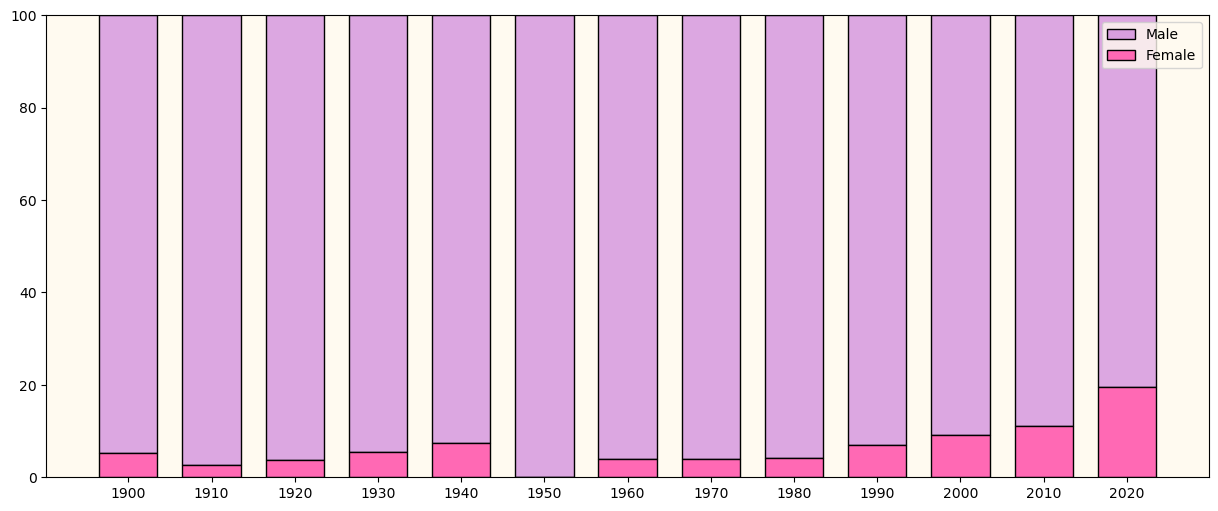

In [10]:
## Plotting Q4 using stacked opposition graph.
plt.rcParams['axes.facecolor'] = '#FFFAF0'
plt.figure(figsize=(15,6))
plt.xticks(countMale['decades'])
plt.ylim(0, 100)

alpha1= 0.5
alpha2= 1.0
color1 = (186/255,85/255,211/255) #rgb color1: 
color2 = (255/255,105/255,180/255) #rgb color2: 
plt.bar(countMale['decades'], 
        countMale['malePortion'], 
        bottom=countMale['femalePortion'], 
        width=7, 
        color=color1 + (alpha1,),
        edgecolor='black',
        label='Male')
plt.bar(countMale['decades'], 
        countMale['femalePortion'],
        width=7,
        color=color2 + (alpha2,),
        edgecolor='black',
        label='Female')


plt.legend()
plt.show()

#Analysis.

            Is there any gender imbalance in this data? How significant is that? Calculate the proportion of female laureates in each decade. Visualize your results and discuss.
            Yes, the gender imbalance of United State's Nobel Winners has been enormous since 1900. On average, over the year span of over 120 years, only 6% of the contributors are females in each decade, and about 94% among all candidates are male. We can observe from the graph that from 1900-1910, USA had a massive decay over women nobel winners, but it has been risen over the course of the next 4 decades til 1940, the portion of female norbel winners has reached new high. After that, the female portion decreased for a few decades and then hitting another new high in the 2000s, where is the highest among all decades, which is around 10.89% in all representing winners.

#5. For the gender imbalance that you found in question 4, is it better or worse within specific prize categories? Visualize your results for each category and discuss. Which of them has the largest gender imbalance? Which has shown some positive trend over the decades?

In [11]:
dftotalw = dfWomen.groupby('category')['prize'].count().reset_index()
dftotal = df4.groupby( 'category')['prize'].count().reset_index()
dftotalw['proportion(%)'] = dftotalw['prize']/dftotal['prize']*100
dftotalw

NameError: name 'dfWomen' is not defined

In [ ]:
dfAll_Sum = df4.groupby(['decades', 'category'])['prize'].count().reset_index()
dfAll_SumIndexed = dfAll_Sum.set_index(['decades'])
#catList = ['Chemistry', 'Economic Sciences', 'Literature', 'Peace', 'Physics', 'Physiology or Medicine']
dfWomen = df4[df4['gender'] == 'female']
dfWomen_Sum = dfWomen.groupby(['decades', 'category'])['prize'].count().reset_index()
## Plot all lines with subplots using different colors to represent the difference.


all_Chem = dfAll_Sum[dfAll_Sum['category'] == 'Chemistry'].set_index(['decades'])
women_Chem = dfWomen_Sum[dfWomen_Sum['category'] == 'Chemistry'].set_index(['decades'])
women_Chem_prob = women_Chem['prize']/all_Chem['prize']
women_Chem_prob = women_Chem_prob.fillna(0)



all_Econ = dfAll_Sum[dfAll_Sum['category'] == 'Economic Sciences'].set_index(['decades'])
all_Econ = all_Econ.merge(all_Chem, on='decades', how='outer').sort_values(by='decades')
all_Econ['category_x'] = all_Econ['category_x'].fillna('Economic Sciences')
all_Econ['prize_x'] = all_Econ['prize_x'].fillna(0)

women_Econ = dfWomen_Sum[dfWomen_Sum['category'] == 'Economic Sciences'].set_index(['decades'])
women_Econ_prob = women_Econ['prize']/all_Econ['prize_x']
women_Econ_prob = women_Econ_prob.fillna(0)

all_Lit = dfAll_Sum[dfAll_Sum['category'] == 'Literature'].set_index(['decades'])
women_Lit = dfWomen_Sum[dfWomen_Sum['category'] == 'Literature'].set_index(['decades'])
women_Lit_prob = women_Lit['prize']/all_Lit['prize']
women_Lit_prob = women_Lit_prob.fillna(0)

all_Peace = dfAll_Sum[dfAll_Sum['category'] == 'Peace'].set_index(['decades'])
women_Peace = dfWomen_Sum[dfWomen_Sum['category'] == 'Peace'].set_index(['decades'])
women_Peace_prob = women_Peace['prize']/all_Peace['prize']
women_Peace_prob = women_Peace_prob.fillna(0)

all_Physics = dfAll_Sum[dfAll_Sum['category'] == 'Physics'].set_index(['decades'])
women_Physics = dfWomen_Sum[dfWomen_Sum['category'] == 'Physics'].set_index(['decades'])
women_Physics_prob = women_Physics['prize']/all_Physics['prize']
women_Physics_prob = women_Physics_prob.fillna(0)

all_Med = dfAll_Sum[dfAll_Sum['category'] == 'Physiology or Medicine'].set_index(['decades'])
women_Med = dfWomen_Sum[dfWomen_Sum['category'] == 'Physiology or Medicine'].set_index(['decades'])
women_Med_prob = women_Med['prize']/all_Med['prize']
women_Med_prob = women_Med_prob.fillna(0)

In [ ]:
x = all_Chem.index
plt.figure(figsize= (15,6))
plt.xticks(df4['decades'])
plt.xlim(1900, 2020)
# plt.ylim(0,100)
plt.plot(x, women_Chem_prob, linestyle='dashed', color='c', label='chem')
plt.plot(x, women_Econ_prob, linestyle='dashed', color='red', label='econ')
plt.plot(x, women_Lit_prob, linestyle='dashed', color='grey', label='lit')
plt.plot(x, women_Peace_prob, linestyle='dashed', color='yellow', label='peace')
plt.plot(x, women_Physics_prob, linestyle='dashed', color='orange', label='physics')
plt.plot(x, women_Med_prob, linestyle='dashed', color='green', label='med')

plt.legend()
plt.title('Female Winners % by Category')

# Display the plot
plt.grid()
plt.show()

#Q5 Analysis:

               We find that the gender imbalance is particularly high in the physical and economic sciences categories, and to a lesser extent in the literature and peace categories. Since the 1980s, the Peace Prize, Literature Prize, and Chemistry Prize have shown positive trends, and the percentage of female winners has increased significantly.


#6. Are there any people who have won the Nobel Prize more than once? Who are they?

In [ ]:
dfPrizeCount = df4.groupby(['full_name'])['prize'].count().sort_values(ascending=False).reset_index()
dfPrizeMultiple = dfPrizeCount[dfPrizeCount['prize'] > 1]
dfPrizeMultiple

    Yes, there are a few people who has won the Nobel Prize more than once, they are Frederick Sanger, K. Barry Sharpless, Marie Curie, née Sklodowska, Linus Carl Pauling, and John Bardeen.

#7. Who are the oldest and youngest people ever to have won a Nobel Prize? How old were the winners generally when they got the prize? Show the summary statistics, and plot the distribution of the age of winners.

In [ ]:
dfBirth = df4.groupby(['full_name','birth_date','year'])['prize'].count().reset_index()
dfBirth['age'] = dfBirth['year'] - dfBirth['birth_date'].str[:4].astype(int)
dfBirth = dfBirth.sort_values('birth_date')
dfBirth

In [ ]:
dfBirth.describe()

#Analysis. 
        
        
        From the dataframe above, we can observe that the oldest people who ever won a Nobel's prize was Christian Matthias Theodor Mommsen who was born in 1817, he was 86 when he got his prize in 1902, and the youngest people who ever won a Nobel's prize was Malala Yousafzai who was born in 1997, in which he was only 17 years old when he received the prize in 2014. The distributions shows that 25% of the people are below or equal to 51 years old, 50% are between 51-60 years old. 75% who are below 69 years old, and the rest are the ones that's below 97 years old.

In [ ]:
plt.hist(dfBirth['age'], bins=100, color='pink', edgecolor='black')
plt.title('Age Distribution')
plt.show()

#8. For your results in question 7, does the average age of winners differ across each category? For each category, show the summary statistics and plot the distribution of the age of winners. Which categories have the largest and smallest average age of winners?


#Anlysis: 

            From our results and observation from Q7 and the graph plotted below, we've found out that the average age of winners differs substantially ranging from 57.1-66.83 in age differences, the max difference is around 10 years, and the minimum difference is around 3 years across all categories. We've created and shown the summary for each category and have graphed their distribution for us to have a better understanding in detail that helps us to gain more insights to the age differences in subject's averages. From the analysis and plot, we found out the the category that has the largest average age is from Economical Sciences, and the least average is from Physics.

In [ ]:
dfBirthCat = df4.groupby(['category','birth_date','year'])['prize'].count().reset_index()
dfBirthCat['birth_date'] = pd.to_datetime(dfBirthCat['birth_date'], format='%d/%m/%Y', errors='coerce').fillna(
    pd.to_datetime(dfBirthCat['birth_date'], format='%Y-%m-%d', errors='coerce'))
dfBirthCat['birth_year'] = dfBirthCat['birth_date'].dt.year
dfBirthCat['age'] = dfBirthCat['year'] - dfBirthCat['birth_year']

In [ ]:
## Deriving the numbers and averages we need.

def create_average(catList, dfOrigin):
    catContainer = []
    for i in range(len(catList)):
        dataFrame = dfOrigin[dfOrigin['category'] == catList[i]]
        catContainer.append(dataFrame)
    return catContainer

catList = ['Chemistry', 'Economic Sciences', 'Literature', 'Peace', 'Physics', 'Physiology or Medicine']
dfMainCat = create_average(catList, dfBirthCat)

dfChem = dfMainCat[0]
summaryChem = dfChem.describe()
chem_average = summaryChem['age']['mean']

dfEcon = dfMainCat[1]
summaryEcon = dfEcon.describe()
econ_average = summaryEcon['age']['mean']

dfLiterature = dfMainCat[2]
summaryLiterature = dfLiterature.describe()
literature_average = summaryLiterature['age']['mean']

dfPeace = dfMainCat[3]
summaryPeace = dfPeace.describe()
peace_average = summaryPeace['age']['mean']

dfPhysics = dfMainCat[4]
summaryPhysics = dfPhysics.describe()
physics_average = summaryPhysics['age']['mean']

dfMed = dfMainCat[5]
summaryMed = dfMed.describe()
med_average = summaryMed['age']['mean']

avg_list = [chem_average, econ_average, literature_average, peace_average, physics_average, med_average]

In [ ]:
## Plotting and Adjusting the Settings
plt.figure(figsize=(15,6))
plt.plot(catList, avg_list, label='Average Age Across Categories', linestyle = 'dotted', color='c')
plt.grid()
plt.title('Average Age All Categories')
#Placing the coordinates.
for i in range(len(catList)):
    plt.annotate('{:.2f}'.format(avg_list[i]), xy=(catList[i], avg_list[i]), xytext=(catList[i], avg_list[i] + 0.05), ha='center', va='bottom')
    

plt.legend()
plt.show()

In [ ]:
dfChem.describe()

In [ ]:
plt.figure(figsize=(15,6))
x = dfChem['age']
plt.hist(x, bins=100, color='pink', edgecolor='black', label='Average Across Chem')
plt.grid()
    
plt.title('Age Distribution Chem')
plt.legend()
plt.show()

In [ ]:
dfEcon.describe()

In [ ]:
plt.figure(figsize=(15,6))
x = dfEcon['age']
plt.hist(x, bins=100, color='yellow', edgecolor='black', label='Average Across Econ')
plt.grid()
    
plt.title('Age Distribution Econ')
plt.legend()
plt.show()

In [ ]:
dfLiterature.describe()

In [ ]:
plt.figure(figsize=(15,6))
x = dfLiterature['age']
plt.hist(x, bins=100, color='c', edgecolor='black', label='Average Across Literature')
plt.grid()
    
plt.title('Literature Distribution Age')
plt.legend()
plt.show()

In [ ]:
dfPeace.describe()

In [ ]:
plt.figure(figsize=(15,6))
x = dfPeace['age']
plt.hist(x, bins=100, color='c', edgecolor='black', label='Average Across Peace')
plt.grid()
    
plt.title('Peace Distribution Age')
plt.legend()
plt.show()

In [ ]:
dfPhysics.describe()

In [ ]:
plt.figure(figsize=(15,6))
x = dfPhysics['age']
plt.hist(x, bins=100, color='y', edgecolor='black', label='Average Across Physics')
plt.grid()
    
plt.title('Physics Distribution Age')
plt.legend()
plt.show()

In [ ]:
dfMed.describe()

In [ ]:
plt.figure(figsize=(15,6))
x = dfMed['age']
plt.hist(x, bins=100, color='purple', edgecolor='black', label='Average Across Med')
plt.grid()
    
plt.title('Med Distribution Age')
plt.legend()
plt.show()

#9. Make some plots to visualize the time trend of the average age of winners in each specific category per decade. What do you find?

In [ ]:
dfChem

In [ ]:
#'Chemistry'
dfChemAvg = dfChem.groupby(['decades'])['age'].mean().reset_index()
dfChemAvg

#Plotting
x = dfChemAvg['decades']
y = dfChemAvg['age']
plt.figure(figsize=(15,6))
plt.plot(x,y, color='c')
plt.grid()
plt.title('Average Age through Decades- Chem')

#Analysis: 

            I found that from the Chem Category, the average age of Nobel Prize Winners are slowly risen. In 1900, the average age of normal Nobel prize's winner is around 52 years old. However, at 1960, it was around 56, 1970 approches 63, and increasing about 5 age range per decades till 2010 and 2020.

In [ ]:
#'Economic Sciences', 
dfEcon['decades'] = (dfEcon['year']//10)*10
dfEconAvg = dfEcon.groupby(['decades'])['age'].mean().reset_index()
dfEconAvg

#Plotting
x = dfEconAvg['decades']
y = dfEconAvg['age']
plt.figure(figsize=(15,6))
plt.plot(x,y, color='r')
plt.grid()
plt.title('Average Age through Decades- Econ')




#Analysis: 

            I found that from the Economics Category, the average of winning the nobel prize decays from 1960 to 1990, where I assume in this amount of time, a lot of new Economist with Nobel prize were born prior with earlier age. However, after the 1990 pivot, the average age of Economics Nobel Prize winners increased again from below age 66 to age 68.

In [ ]:
##Literature
dfLiterature['decades'] = (dfLiterature['year']//10)*10
dfLitAvg = dfLiterature.groupby(['decades'])['age'].mean().reset_index()
dfLitAvg

#Plotting
x = dfLitAvg['decades']
y = dfLitAvg['age']
plt.figure(figsize=(15,6))
plt.plot(x,y, color='brown')
plt.grid()
plt.title('Average Age through Decades- Literature')


#Analysis: 

            I found that from the Literature Category have also been risen in average age as well, and I think that the main reason for people to obtain Nobel prize late is because of the amount of systematic change we had during these 12 decades. From 1900- 2020, our life and surroundings have changed dramatically, we have been shifting from the industrial revolution where people has mass amount of pressure and dissatisfaction from the society to a decade where people mostly used technologies and are be surrounded by type of environment that is recaptured by social media, fast foods, and consumer products. Thus, it requries us more time and effort to be able to practice and perform in literature.

In [ ]:
##Peace

dfPeace['decades'] = (dfPeace['year']//10)*10
dfPeaceAvg = dfPeace.groupby(['decades'])['age'].mean().reset_index()
dfPeaceAvg


#Plotting
x = dfPeaceAvg['decades']
y = dfPeaceAvg['age']
plt.figure(figsize=(15,6))
plt.plot(x,y, color='teal')
plt.grid()
plt.title('Average Age through Decades- Peace')


#Analysis: 

            I found that however, for the peace category, the average age has becoming a decay over the years. While from 1900 - 2910, the average age is about 64-67 years old, hitting a climax at 76 years old at 1940, however, after 1940, a serious of decrease occured. While, in 1980 the average age is about 56, and around 2010, the average age is long below 50. I believe that this is also important due to our shift of our political and social economical systems. While more people are getting affordable housing, pricing, and proper management. The level of civilization has increased, thus, people who works and contribute in peace industry are more willing to contribute due to enormous amount of funds flowing into the industry.

In [ ]:

## Physics
dfPhysics['decades'] = (dfPhysics['year']//10)*10
dfPhyAvg = dfPhysics.groupby(['decades'])['age'].mean().reset_index()
dfPhyAvg

#Plotting
x = dfPhyAvg['decades']
y = dfPhyAvg['age']
plt.figure(figsize=(15,6))
plt.plot(x,y, color='gold')
plt.grid()
plt.title('Average Age through Decades- Physics')



#Analysis: 

            I found that from the Physics category, the average amount of age of Nobel prize winners has been risen over an almost linear slope. This is strongly due to the difficulty level of coming up with new physics theories. While the most brand span physics theory are settled already based on Einstein and Newton, new discoveries and insights are being posted day to day. However, based on the improvement of technology and all different types of accessories inside the indsutry, the average age of Physics Nobel Prize winners has been largely delayed.

In [ ]:
##Medicine

dfMed['decades'] = (dfMed['year']//10)*10
dfMedAvg = dfMed.groupby(['decades'])['age'].mean().reset_index()
dfMedAvg

#Plotting
x = dfMedAvg['decades']
y = dfMedAvg['age']
plt.figure(figsize=(15,6))
plt.plot(x,y, color='green')
plt.grid()
plt.title('Average Age through Decades- Med')


#Analysis: 

            I found that the med industry has the similarity that share with a physics Nobel winner. We can see that as the time approaches more to the modern time, the average age of Med Nobel winner has been delayed from 56 - 67 by almost 10 years as well. Indeed, I believe the conclusion has came with the same as the physics industry, while modern medicine and physics are already based on a variety of settings and variety of pre-exisiting theories, thus, causing the increment to speed up.

#10. Repeat the analysis in question 9, but with lifespan instead of age. What do you find?

In [ ]:
col = ['year','category','birth_date','death_date']
dfls = df[col].dropna() 
dfls['decades'] = (dfls['year']// 10)* 10
dfls['lifespan'] = (dfls['death_date'].str[0:4].astype(int)) - (dfls['birth_date'].str[0:4].astype(int))
dfls


In [ ]:
dfLifespan = dfls.groupby(['category','decades'])['lifespan'].mean().reset_index()
dfLifespan

In [ ]:
dfChemspan = dfLifespan[dfLifespan['category'] == 'Chemistry']
dfChemspan

In [ ]:
#Plotting 
x = dfChemspan['decades']
y = dfChemspan['lifespan']
plt.figure(figsize=(15,6))
plt.grid()
plt.plot(x, y, color='c', label='avg lifespan')
plt.title('Average Lifespan in Chemistry')
plt.legend()
plt.show()

#Analysis: 

            We find that, except in the 1900s and 1910s, the average lifespan of chemistry prize winners is over 70 years, and the trend is increasing.

In [ ]:
dfEconspan = dfLifespan[dfLifespan['category'] == 'Economic Sciences']
dfEconspan

In [ ]:
#Plotting 
x = dfEconspan['decades']
y = dfEconspan['lifespan']
plt.figure(figsize=(15,6))
plt.grid()
plt.plot(x, y, color='c', label='avg lifespan')
plt.title('Average Lifespan in Econ')
plt.legend()
plt.show()

#Analysis: 

          The lifespan of the winners of the economic science prize is relatively large, reaching a peak of 87.11 years for the winners in the 1980s; it then fell back, and for the winners of the 2010s, their lifespan only reached 84 years old.

In [ ]:
dfLitspan = dfLifespan[dfLifespan['category'] == 'Literature']
dfLitspan 

In [ ]:
#Plotting 
x = dfLitspan['decades']
y = dfLitspan['lifespan']
plt.figure(figsize=(15,6))
plt.grid()
plt.plot(x, y, color='c', label='avg lifespan')
plt.title('Average Lifespan in Lit')
plt.legend()
plt.show()

#Analysis: 

           The lifespan of a literary award winner fluctuates widely. The average lifespan of the winners in the 1930s was only 72.2 years old, and then rose all the way. The average lifespan of the winners after the 1980s was over 84 years old

In [ ]:
dfPeacespan = dfLifespan[dfLifespan['category'] == 'Peace']
dfPeacespan

In [ ]:
#Plotting 
x = dfPeacespan['decades']
y = dfPeacespan['lifespan']
plt.figure(figsize=(15,6))
plt.grid()
plt.plot(x, y, color='c', label='avg lifespan')
plt.title('Average Lifespan in Peace')
plt.legend()
plt.show()

#Analysis: 

           The average lifespan of the Peace Prize winners varies greatly and is irregular. The maximum value appeared in the winners in the 1940s, which was 89.75 years old; the minimum value appeared in the winners in the 2010s, who were only 62 years old.

In [ ]:
dfPhysicspan = dfLifespan[dfLifespan['category'] == 'Physics']
dfPhysicspan

In [ ]:
#Plotting 
x = dfPhysicspan['decades']
y = dfPhysicspan['lifespan']
plt.figure(figsize=(15,6))
plt.grid()
plt.plot(x, y, color='red', label='avg lifespan')
plt.title('Average Lifespan in Physics')
plt.legend()
plt.show()

#Analysis: 

            The average lifespan in Physics was kind of weird since in 1920 it was 82, and in 1930 and 1940 there was only 76 years old. I believe that there was not so much info about the years in 1920, thus, the extreme value corrupted the current trend. However, we can see that from the rise of 1930-1960, the average lifespan had increased decades over decades from 76 yo to 80yo.

In [ ]:
dfMedspan = dfLifespan[dfLifespan['category'] == 'Physiology or Medicine']
dfMedspan

In [ ]:
#Plotting 
x = dfMedspan['decades']
y = dfMedspan['lifespan']
plt.figure(figsize=(15,6))
plt.grid()
plt.plot(x, y, color='green', label='avg lifespan')
plt.title('Average Lifespan in Med')
plt.legend()
plt.show()

#Analysis: 

            The average lifespan in Med was usually very high since medicine and physicts takes great care of their body, and the average has also been increase from 72 yo to 88 yo, despite a significant drop for the 2000s winners.

In [ ]:
## Total Plotting
plt.figure(figsize=(15,6))
#Plotting 
xChem = dfChemspan['decades']
yChem = dfChemspan['lifespan']
plt.plot(xChem, yChem, color='purple', label='avg lifespan-chem')


xEcon = dfEconspan['decades']
yEcon = dfEconspan['lifespan']
plt.plot(xEcon, yEcon, color='gold', label='avg lifespan-econ')

xLit = dfLitspan['decades']
yLit = dfLitspan['lifespan']
plt.plot(xLit, yLit, color='brown', label='avg lifespan-peace')

xPeace = dfPeacespan['decades']
yPeace = dfPeacespan['lifespan']
plt.plot(xPeace, yPeace, color='c', label='avg lifespan-peace')

xPhysics = dfPhysicspan['decades']
yPhysics = dfPhysicspan['lifespan']
plt.plot(xPhysics, yPhysics, color='red', label='avg lifespan-physics')

xMed = dfMedspan['decades']
yMed = dfMedspan['lifespan']
plt.plot(xMed, yMed, color='green', label='avg lifespan-med')

plt.xticks(xChem)
plt.ylim(0,100)
plt.title('Average Lifespan in Med')
plt.legend()
plt.grid()
plt.show()